In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
phones = pd.read_csv("/Users/livio/Downloads/best-selling-mobile-phones.csv")

In [3]:
phones.head()

,manufacturer,model,form,smartphone,year,units_sold_m
0,Nokia,1100,Bar,No,2003,250.0
1,Nokia,1110,Bar,No,2005,247.5
2,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen,Yes,2014,224.0
3,Nokia,"105 (2013), 105 (2015)",Bar,No,2013,200.0
4,Apple,iPhone 6S and iPhone 6S Plus,Touchscreen,Yes,2015,174.1


- Manufacturer , Model , Form are categorical features in our dataset

Numerical features
- Units sold, Year

In [4]:
phones.shape

(111, 6)

There are 111 rows and 6 columns in our dataset

In [5]:
phones.dtypes

manufacturer     object
model            object
form             object
smartphone       object
year              int64
units_sold_m    float64
dtype: object

In [8]:
phones.describe(include = ['O'])

,manufacturer,model,form,smartphone
count,111,111,111,111
unique,14,111,7,2
top,Samsung,1100,Touchscreen,Yes
freq,35,1,70,76


In [9]:
phones.isnull().sum()

manufacturer    0
model           0
form            0
smartphone      0
year            0
units_sold_m    0
dtype: int64

In [10]:
duplicatedphones = phones[phones.duplicated()]
print(duplicatedphones)

Empty DataFrame
Columns: [manufacturer, model, form, smartphone, year, units_sold_m]
Index: []


In [13]:
duplicatedphones = phones[phones[['year','form']].duplicated()]
print(duplicatedphones)

    manufacturer                               model         form smartphone  \
10         Nokia                                6600          Bar        Yes   
17         Nokia                    1600 (1650/1661)          Bar         No   
20         Nokia                         1208 (1209)          Bar         No   
22         Nokia                    6010 (6020/6030)          Bar         No   
23       Samsung  Galaxy S III and Galaxy S III Mini  Touchscreen        Yes   
..           ...                                 ...          ...        ...   
103      Samsung                         Galaxy A10s  Touchscreen        Yes   
104      Samsung                         Galaxy A30s  Touchscreen        Yes   
106           LG                                  G2  Touchscreen        Yes   
107         LeTV                         LeEco Le 1s  Touchscreen        Yes   
108       Google                  Pixel and Pixel XL  Touchscreen        Yes   

     year  units_sold_m  
10   2003    

In [14]:
phones.nunique()

manufacturer     14
model           111
form              7
smartphone        2
year             22
units_sold_m     69
dtype: int64

(5.0, 0.0)

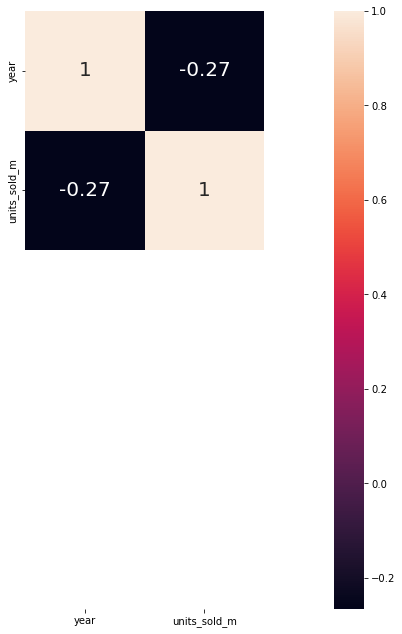

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,11))
ax = sns.heatmap(phones.corr(), vmax=1, square=True, annot_kws={'size':20}, annot=True)
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(5.0, 0) 

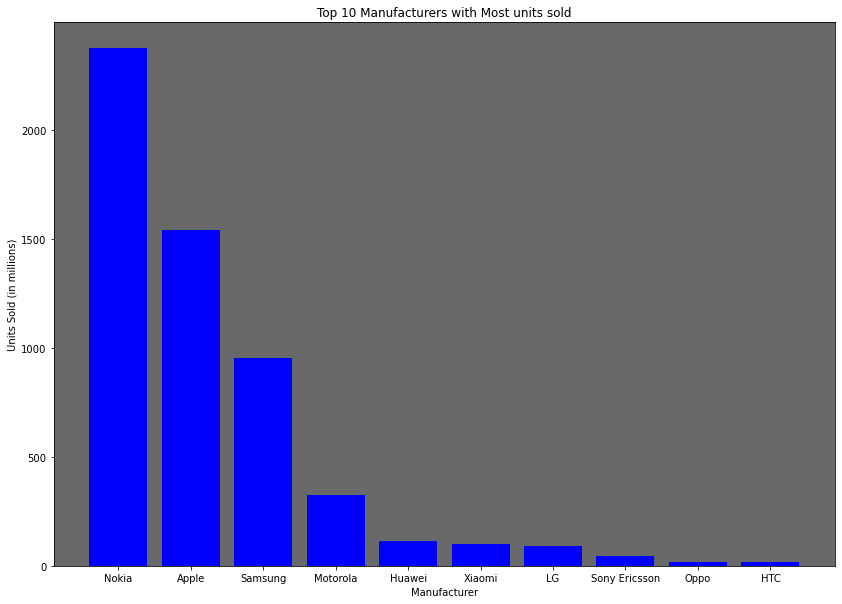

In [71]:
#Top 10 Manufactureres with most units sold
phone=phones.groupby('manufacturer')['units_sold_m'].agg([sum]).sort_values(by=('sum'),ascending=False).reset_index().head(10)

fig1, ax1 = plt.subplots(figsize=(14, 10))
ax1.set_facecolor('dimgrey')
ax1.bar(phone['manufacturer'],phone['sum'],color='blue')
plt.title('Top 10 Manufacturers with Most units sold')
plt.xlabel("Manufacturer")
plt.ylabel("Units Sold (in millions)")
plt.show()

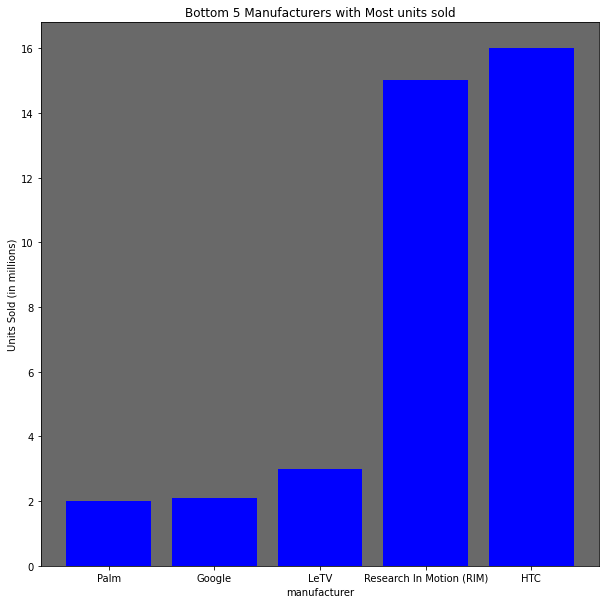

In [55]:

phone=phones.groupby('manufacturer')['units_sold_m'].agg([sum]).sort_values(by=('sum'),ascending=True).reset_index().head(5)

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.set_facecolor('dimgrey')
ax1.bar(phone['manufacturer'],phone['sum'],color='blue')
plt.title('Bottom 5 Manufacturers with Most units sold')
plt.xlabel("manufacturer")
plt.ylabel("Units Sold (in millions)")
plt.show()

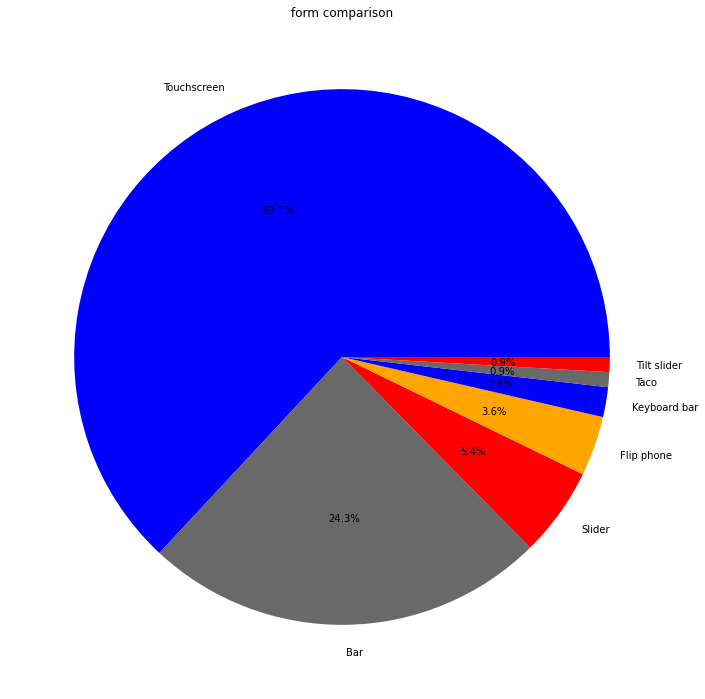

In [63]:
value = phones['form'].value_counts()
my_colors = ['blue', 'dimgrey', 'red','orange']
my_explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12, 14))
ax1.pie(value.values,labels=value.index,autopct='%1.1f%%', colors=my_colors)
plt.title('form comparison')
plt.show()

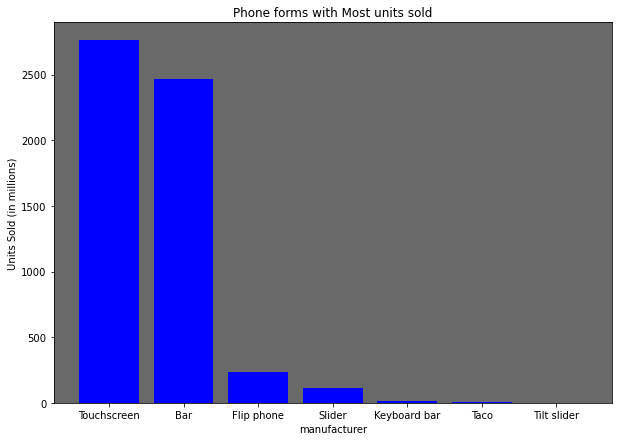

In [43]:

phone=phones.groupby('form')['units_sold_m'].agg([sum]).sort_values(by=('sum'),ascending=False).reset_index().head(8)

fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_facecolor('dimgrey')
ax1.bar(phone['form'],phone['sum'],color='blue')
plt.title('Phone forms with Most units sold')
plt.xlabel("manufacturer")
plt.ylabel("Units Sold (in millions)")
plt.show()

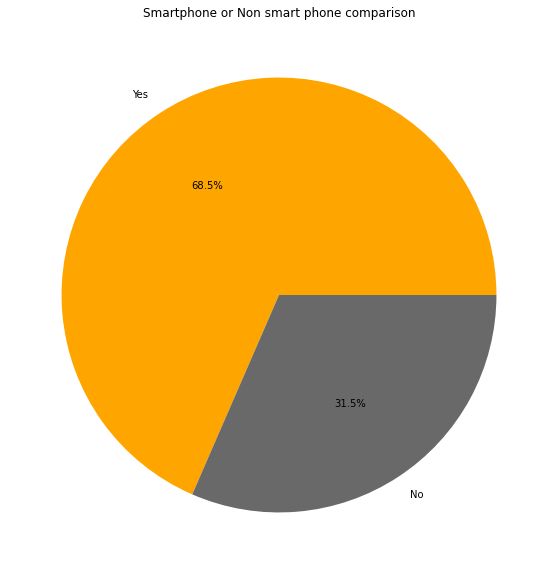

In [62]:
value = phones['smartphone'].value_counts()
my_colors = ['orange', 'dimgrey']
my_explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12, 10))
ax1.pie(value.values,labels=value.index,autopct='%1.1f%%', colors=my_colors)
plt.title('Smartphone or Non smart phone comparison')
plt.show()

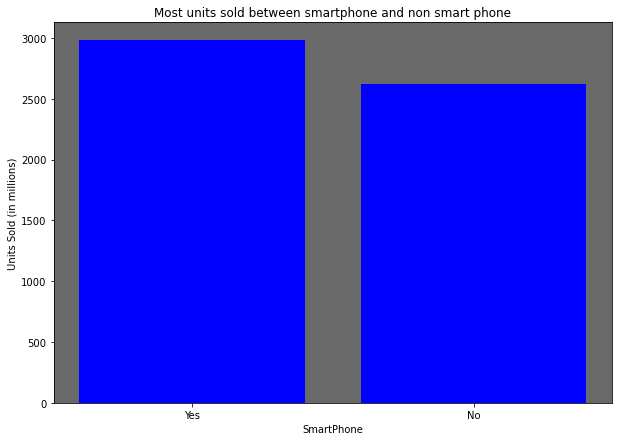

In [66]:
phone=phones.groupby('smartphone')['units_sold_m'].agg([sum]).sort_values(by=('sum'),ascending=False).reset_index().head(8)

fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_facecolor('dimgrey')
ax1.bar(phone['smartphone'],phone['sum'],color='blue')
plt.title('Most units sold between smartphone and non smart phone')
plt.xlabel("SmartPhone")
plt.ylabel("Units Sold (in millions)")
plt.show()

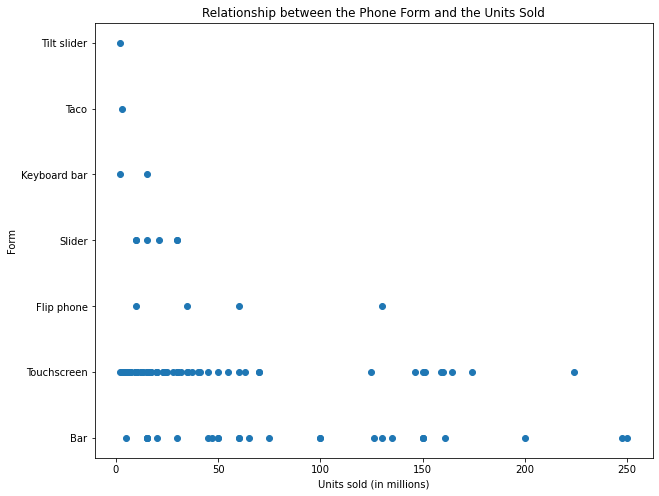

In [72]:
plt.figure(figsize = (10,8))
plt.scatter(phones['units_sold_m'],phones['form'], label = "Units sold")
plt.xlabel("Units sold (in millions)")
plt.ylabel("Form")
plt.title("Relationship between the Phone Form and the Units Sold")
plt.show()

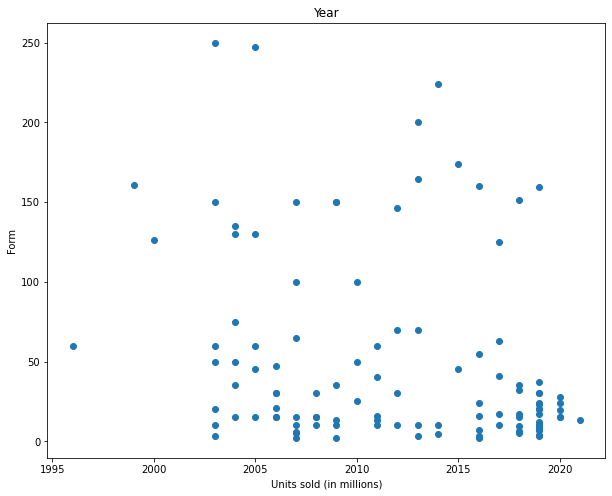

In [107]:
plt.figure(figsize = (10,8))
plt.scatter(phones['year'],phones['units_sold_m'], label = "Units sold")
plt.xlabel("Units sold (in millions)")
plt.ylabel("Form")
plt.title("Year")
plt.show()

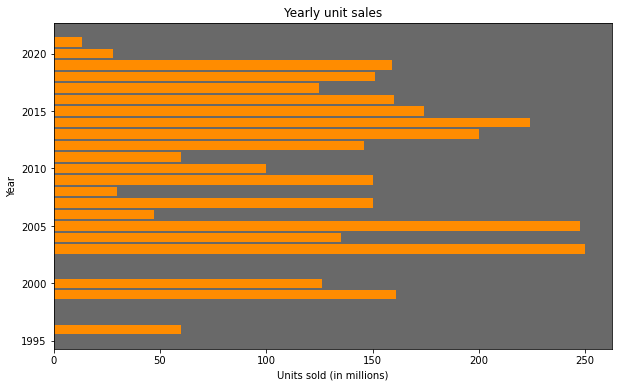

In [114]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax1.barh(phones['year'],phones['units_sold_m'],color='darkorange')
plt.title('Yearly unit sales')
plt.ylabel("Year")
plt.xlabel("Units sold (in millions)")

plt.show()

/var/folders/sp/3r5qj8c53y3c2cy839p_2wk80000gn/T/ipykernel_76575/2231943067.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


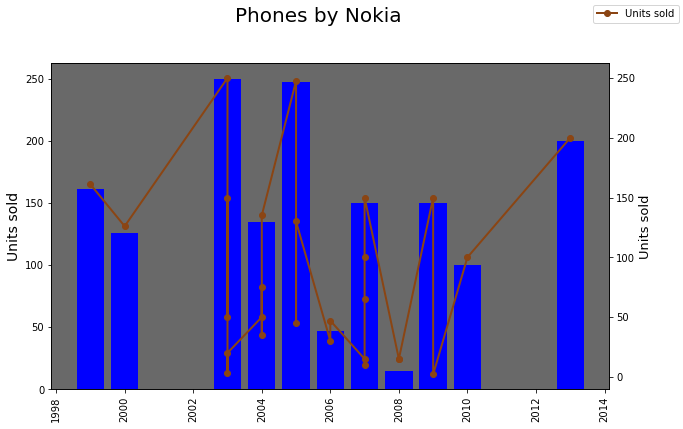

In [115]:
Nokia = phones[phones["manufacturer"].isin(["Nokia"]) ]
Nokia = Nokia.sort_values(by="year")

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax2 = ax1.twinx()
ax1.bar(Nokia["year"],Nokia["units_sold_m"], color = "blue", label ="" )
ax1.set_ylabel("Units sold", fontsize =14)
ax1.tick_params(axis='x', labelrotation = 90)

ax2.plot(Nokia["year"],Nokia["units_sold_m"],color = "saddlebrown",marker ="o",lw =2, label = "Units sold")
ax2.set_ylabel("Units sold", fontsize =13)

plt.suptitle("Phones by Nokia ", fontsize =20,y =1.01)
plt.title("", fontsize =14)
fig.legend(loc="upper right")
fig.show()

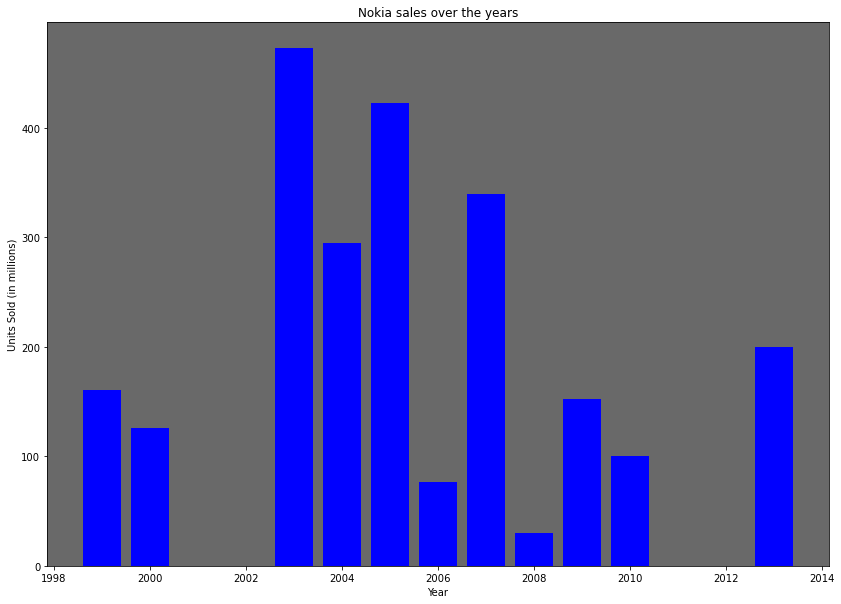

In [113]:
Nokia = phones[phones["manufacturer"].isin(["Nokia"]) ]
Nokia_p = Nokia.groupby('year')['units_sold_m'].agg([sum]).sort_values(by=('sum'),ascending=False).reset_index().head(20)

fig1, ax1 = plt.subplots(figsize=(14, 10))
ax1.set_facecolor('dimgrey')
ax1.bar(Nokia_p['year'],Nokia_p['sum'],color='blue')
plt.title('Nokia sales over the years')
plt.xlabel("Year")
plt.ylabel("Units Sold (in millions)")
plt.show()

/var/folders/sp/3r5qj8c53y3c2cy839p_2wk80000gn/T/ipykernel_76575/2420837311.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


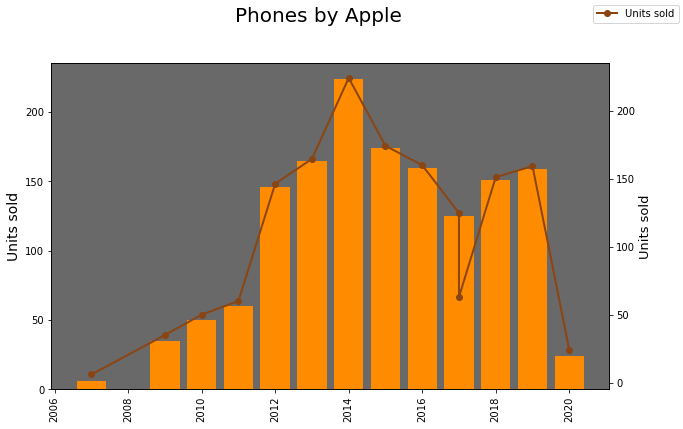

In [112]:
Apple = phones[phones["manufacturer"].isin(["Apple"]) ]
Apple = Apple.sort_values(by="year")

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax2 = ax1.twinx()
ax1.bar(Apple["year"],Apple["units_sold_m"], color = "darkorange", label ="" )
ax1.set_ylabel("Units sold", fontsize =14)
ax1.tick_params(axis='x', labelrotation = 90)

ax2.plot(Apple["year"],Apple["units_sold_m"],color = "saddlebrown",marker ="o",lw =2, label = "Units sold")
ax2.set_ylabel("Units sold", fontsize =13)

plt.suptitle("Phones by Apple ", fontsize =20,y =1.01)
plt.title("", fontsize =14)
fig.legend(loc="upper right")
fig.show()